In [1]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# =========================
# 2. Load Dataset
# =========================
# Update path if needed
df = pd.read_csv("/kaggle/input/super-store-data-set/train.csv")

# Quick Look
print(df.head())
print(df.info())
print(df.describe())



   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [2]:
# =========================
# 3. Data Cleaning
# =========================

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors="coerce")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors="coerce")

# Handle missing values (drop rows with null in important columns)
df = df.dropna(subset=['Order Date', 'Ship Date', 'Sales'])

# Reset index
df.reset_index(drop=True, inplace=True)

print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (2676, 18)


In [3]:
# =========================
# 4. Save Cleaned Dataset
# =========================
df.to_csv("/kaggle/working/cleaned_superstore.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_superstore.csv")


✅ Cleaned dataset saved as cleaned_superstore.csv


/tmp/ipykernel_36/1857436430.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Region", y="Sales", estimator=sum, ci=None)


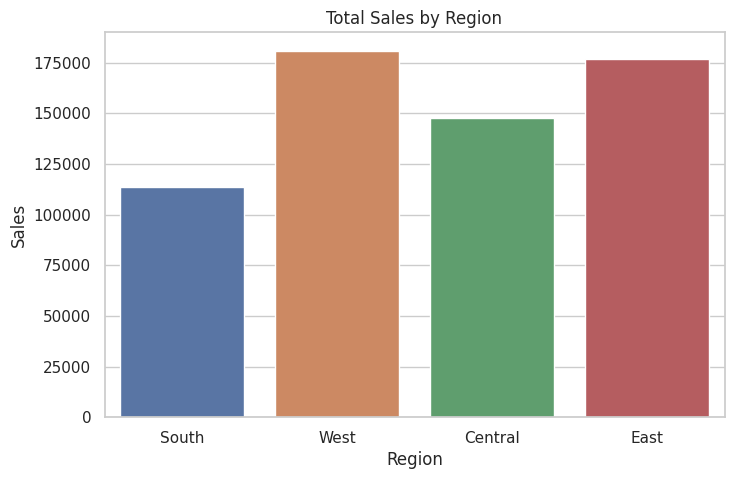

In [4]:
# =========================
# 5. Data Visualization - Sales by Region
# =========================
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Region", y="Sales", estimator=sum, ci=None)
plt.title("Total Sales by Region")
plt.savefig("/kaggle/working/sales_by_region.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_36/1947052271.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Category", y="Sales", estimator=sum, ci=None)


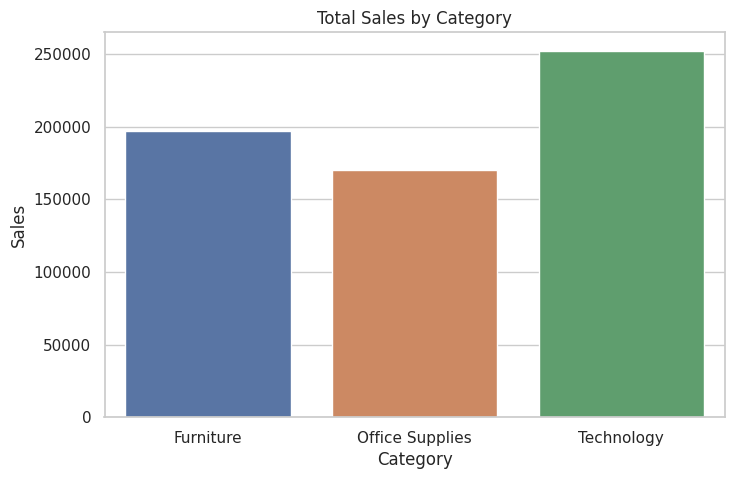

In [5]:
# =========================
# 6. Data Visualization - Sales by Category
# =========================
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Category", y="Sales", estimator=sum, ci=None)
plt.title("Total Sales by Category")
plt.savefig("/kaggle/working/sales_by_category.png", dpi=300, bbox_inches="tight")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


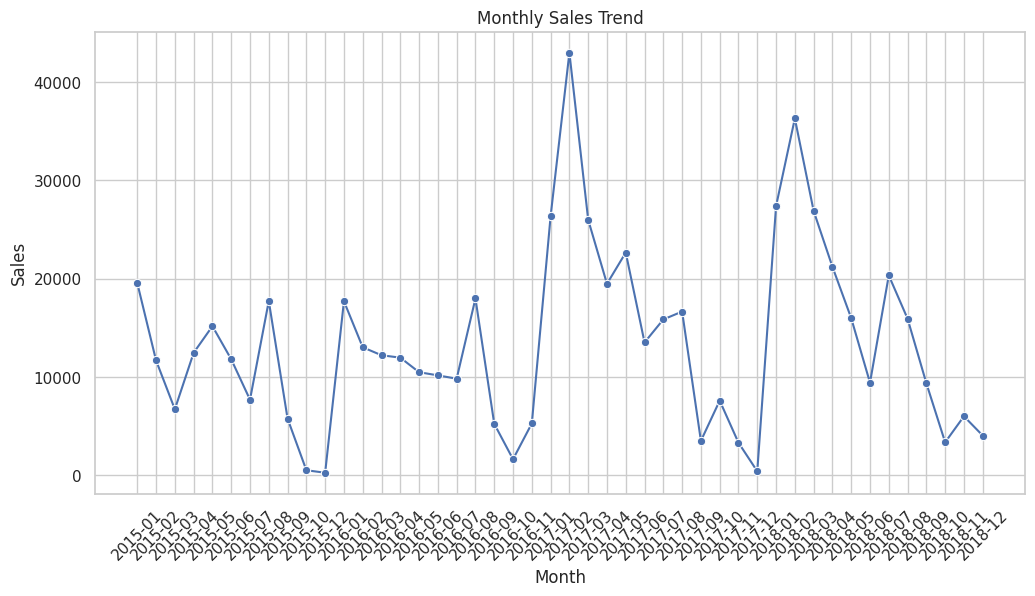

In [6]:
# =========================
# 7. Data Visualization - Monthly Sales Trend
# =========================
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month", y="Sales", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.savefig("/kaggle/working/monthly_sales_trend.png", dpi=300, bbox_inches="tight")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


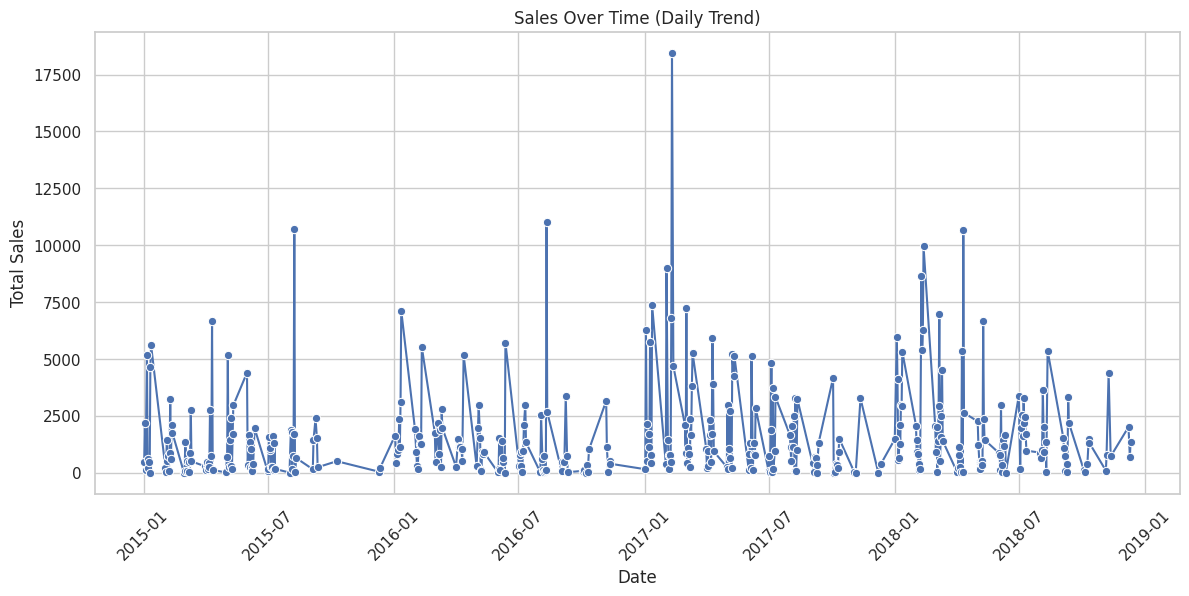

In [7]:
# =========================
# 8. Data Visualization - Sales Over Time (Daily Trend)
# =========================

# Group sales by Order Date
daily_sales = df.groupby("Order Date")["Sales"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_sales, x="Order Date", y="Sales", marker="o", linewidth=1.5)
plt.title("Sales Over Time (Daily Trend)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.savefig("/kaggle/working/sales_over_time.png", dpi=300, bbox_inches="tight")
plt.show()
